In [82]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import re

In [83]:
# set parameters
np.random.seed(0)
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
data_dir = "data/cinic10"

batch_size = 64
epochs = 15

steps_per_epoch = 100
steps_per_epoch = min(steps_per_epoch, 90000/batch_size)

In [84]:
# create generators for the training and test sets

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    
)
train_generator = datagen.flow_from_directory(
    data_dir + "/train",
    target_size=(32, 32),  # Resize images to this size
    batch_size=batch_size,  # Number of images to load at each iteration
    class_mode="categorical",
)  # Type of classification ('binary' or 'categorical')

test_generator = datagen.flow_from_directory(
    data_dir + "/test",
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode="categorical",
)

Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.


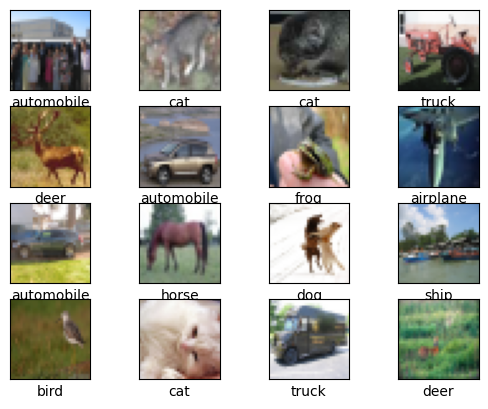

In [93]:
# # check if images are properly loaded
images, labels = next(train_generator)

# Plot the first 16 images of the batch
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    # Assuming 'classes' is a list of class names in the order they are indexed by the generator
    # Decode the one-hot encoded labels to find the class index, then get the class name
    plt.xlabel(classes[labels[i].argmax()])

plt.show()

In [88]:
# create cnn model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))


model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [89]:
# fit model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=steps_per_epoch,
)

Epoch 1/15
100/100 [==============================] - 4s 35ms/step - loss: 2.1212 - accuracy: 0.1927 - val_loss: 1.9708 - val_accuracy: 0.2631
Epoch 2/15
100/100 [==============================] - 4s 36ms/step - loss: 1.8991 - accuracy: 0.2911 - val_loss: 1.8728 - val_accuracy: 0.3002
Epoch 3/15
100/100 [==============================] - 3s 33ms/step - loss: 1.7965 - accuracy: 0.3272 - val_loss: 1.8090 - val_accuracy: 0.3314
Epoch 4/15
100/100 [==============================] - 3s 33ms/step - loss: 1.7747 - accuracy: 0.3339 - val_loss: 1.7475 - val_accuracy: 0.3441
Epoch 5/15
100/100 [==============================] - 3s 34ms/step - loss: 1.6663 - accuracy: 0.3755 - val_loss: 1.6711 - val_accuracy: 0.3773
Epoch 6/15
100/100 [==============================] - 3s 34ms/step - loss: 1.6545 - accuracy: 0.3770 - val_loss: 1.6469 - val_accuracy: 0.3875
Epoch 7/15
100/100 [==============================] - 3s 33ms/step - loss: 1.6279 - accuracy: 0.3963 - val_loss: 1.6057 - val_accuracy: 0.4061

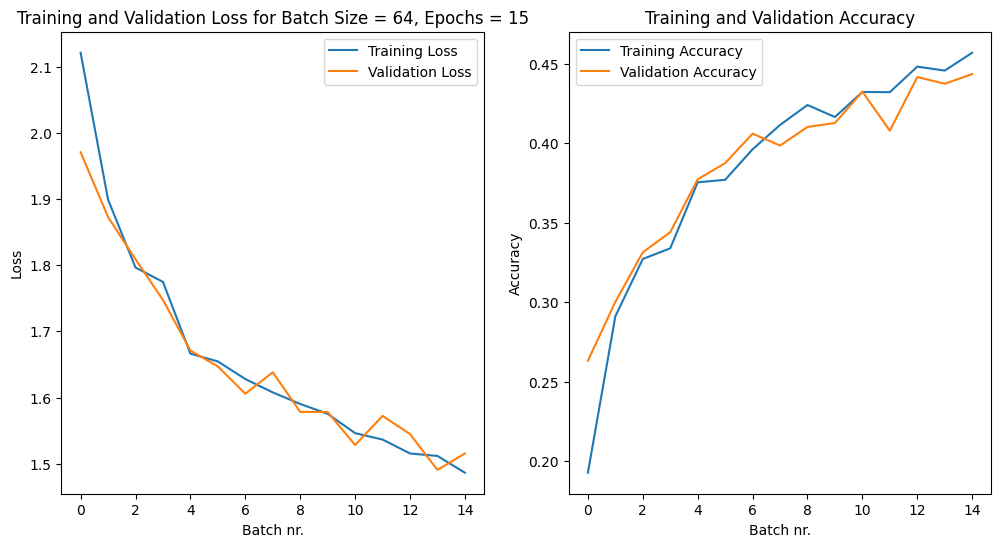

In [96]:

# Plotting training and validation loss
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title(f'Training and Validation Loss for Batch Size = {batch_size}, Epochs = {epochs}')
axs[0].set_xlabel('Batch nr.')
axs[0].set_ylabel('Loss')

# Plot training and validation accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].set_xlabel('Batch nr.')
axs[1].set_ylabel('Accuracy')

axs[0].legend()
axs[1].legend()


In [97]:
# function for auto saving new models
def save_model_with_version(model, accuracy, base_path="models/cnn/"):
    pattern = r"v(\d+)"  # Regex to find version numbers
    max_version = 0
    
    # Check for existing models and find the highest version number
    if not os.path.exists(base_path):
        os.makedirs(base_path)
    for filename in os.listdir(os.path.dirname(base_path)):
        match = re.search(pattern, filename)
        if match:
            version = int(match.group(1))
            max_version = max(max_version, version)
    
    # Increment the version for the new model
    new_version = max_version + 1
    model_path = f"{base_path}cnn_v{new_version}_{round(accuracy,4)}.model"
    
    # Save the model
    model.save(model_path)
    print(f"Model saved as {model_path}")

In [98]:
#evaluate and save model
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print(f"Loss: {loss}, Accuracy: {accuracy}")

save_model_with_version(model, accuracy)

1407/1407 [==============================] - 23s 16ms/step - loss: 1.5291 - accuracy: 0.4373
Loss: 1.5291271209716797, Accuracy: 0.4373222291469574
INFO:tensorflow:Assets written to: models/cnn/cnn_v4_0.4373222291469574.model/assets


INFO:tensorflow:Assets written to: models/cnn/cnn_v4_0.4373222291469574.model/assets


Model saved as models/cnn/cnn_v4_0.4373222291469574.model
